<a href="https://colab.research.google.com/github/Narendraiitg/Image_Processing_Tuitorial/blob/main/Scipy_ndimage_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A	two-dimensional	image	can	be	described	as a	function of	two variables	f(x,y).		For	a	grayscale	image,	
the	value	of	f(x,y)	specifies	the	brightness	of	the	image	pixel	at	position	(x,y).		(For	a	color	image,	the	
function	specifies	a	red,	green,	and	blue	value	for	each	position	(x,y),	but	in	this	class,	we’ll	be	concerned	
primarily	with	grayscale	images.)	
If	an	image	is	obtained	by a	real-world	instrument such	as	a	digital	camera	or	microscope,	then	the	
image	is	never	perfect;	some	random	perturbations	are	introduced,	due	both	to	imperfections	in	the	
instrument	and	to	physical	laws that	limit	measurement	accuracy.		We	refer	to	these	random	
perturbations	as	“noise.”	

***Image Processing using scipy***

Scipy is a python library that is part of numpy stack. It contains modules for linear algebra, FFT, signal processing and image processing. Scipy is not specifically designed for image processing but it has a few useful tools. This tutorial covers the basic image processing functionality of scipy library in Python.

In [56]:
from skimage import io

In [57]:
img=io.imread("/istockphoto-1354441996-170667a.jpg")

In [58]:
print(type(img))

<class 'numpy.ndarray'>


So we got the numpy array format of loaded image 

In [60]:
print(img.shape,img.dtype)

(339, 509, 3) uint8


So the image size is 339x509 with 3 channels ie RGB and datatype is unsigned integer 8 bit

In [62]:
img2=io.imread("/istockphoto-1354441996-170667a.jpg",as_gray=True)

In [63]:
print(img2.shape,img2.dtype)

(339, 509) float64


So now our image is gray scale image we can se it does not have 3 channel and data type is float 64 that is the value of the pixel will lie in the close interval of 0 and 1 in which 0 denotes the black and 1 denotes the white pixel

In [65]:
# We can print the pixel values on the specific loaction of an image
print(img[0,0])

[17  8  3]


Above one D array denotes the pixel value of 0,0 pixel whose R value is 17, G value is 8 and B value is 3

In [66]:
print(img2[0,0])

0.03745882352941177


Since the image 2 is the gray scale image so it will have only one value corresponding to the single pixel

In [69]:
# We can also print the minimum, maximum and mean values of the pixels of gray scale image
mean_gray=img2.mean()
min_value=img2.min()
max_value=img2.max()

print("Mean, Min and Max values of the pixels are ", mean_gray, min_value, max_value)


Mean, Min and Max values of the pixels are  0.2860580146818769 0.007590196078431373 1.0


So the mean, min and max values of the pixel are 0.28605, 0.00789 and 1 respectively

In [71]:
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt

In [75]:
flippedLR=np.fliplr(img)
flippedUD=np.flipud(img)

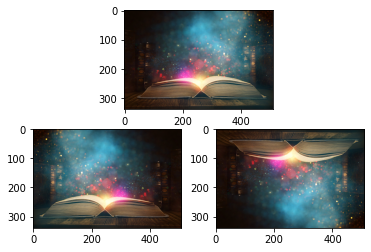

In [77]:
plt.subplot(2,1,1)
plt.imshow(img) # original image
plt.subplot(2,2,3)
plt.imshow(flippedLR) # left to right flipped image
plt.subplot(2,2,4)
plt.imshow(flippedUD) # Up to down flipped image

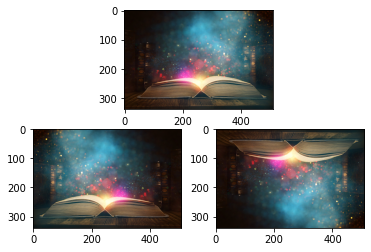

In [82]:
plt.subplot(2,1,1)
plt.imshow(img, cmap="Greys") # original image
plt.subplot(2,2,3)
plt.imshow(flippedLR, cmap="Blues") # left to right flipped image
plt.subplot(2,2,4)
plt.imshow(flippedUD, cmap="hsv") # Up to down flipped image

So we can not be process the RGB imgaes from above we can see that there is no effect of cmap on the colored/RGB images lets see the same cmap on gray scale image

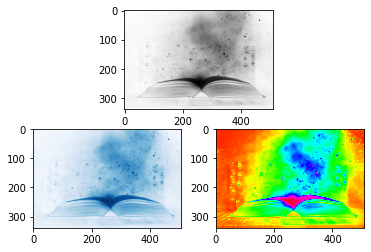

In [83]:
plt.subplot(2,1,1)
plt.imshow(img2, cmap="Greys") # original image
plt.subplot(2,2,3)
plt.imshow(img2, cmap="Blues") # left to right flipped image
plt.subplot(2,2,4)
plt.imshow(img2, cmap="hsv") # Up to down flipped image

From above it is cleared that if we want to process any image loaded in the form of numpy array than we need to convert the RGB to its equivalnt before processing the same

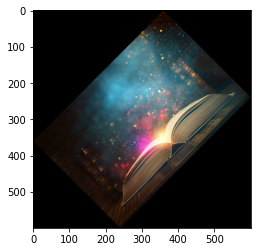

In [84]:
# lets rotate the image by 45 
rotated_img=ndimage.rotate(img,45)
plt.imshow(rotated_img)

Above image is fitted in the frame without cutting its corner

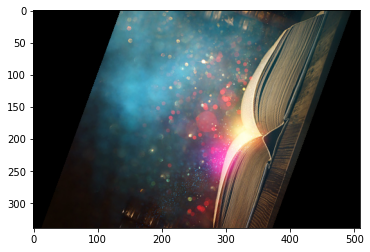

In [85]:
# lets rotate the image by 70 
rotated_img2=ndimage.rotate(img,70,reshape=False)
plt.imshow(rotated_img2)

Now we can see that the image is not fitted in the frame as we made reshape as false which made it non fiitted in the frame

**Let's do some filtering by using ndimage**

1) Uniform filter

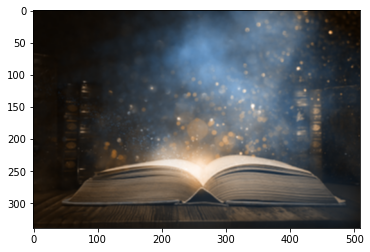

In [86]:
# Applying the uniform filter on an image with size 3
unifor_filter=ndimage.uniform_filter(img, size=3)
plt.imshow(unifor_filter)

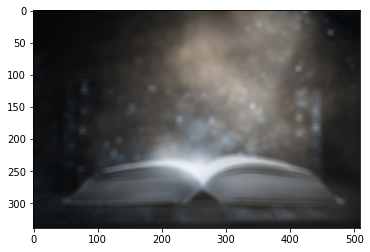

In [87]:
# Applying the uniform filter on an image with size 9
unifor_filter=ndimage.uniform_filter(img, size=9)
plt.imshow(unifor_filter)

From above we can conclude that the uniform filter is the kind of blurring filter as by increasing the size of the filter it increases the blurrness in the resulting image

2) Gaussion Filter

-->> Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function

-->> A	Gaussian	filter typically	yields the smoothest	image.

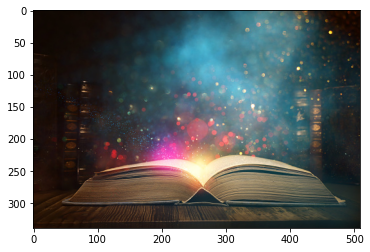

In [90]:
# Applying the Gaussian filter on an image with sigma 0
gaussian_filter=ndimage.gaussian_filter(img, sigma=0)
plt.imshow(gaussian_filter)

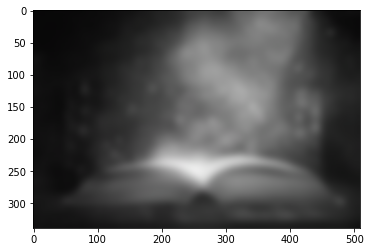

In [94]:
# Applying the Gaussian filter on an image with sigma 6
gaussian_filter=ndimage.gaussian_filter(img, sigma=6)
plt.imshow(gaussian_filter)

From above we can conclude that the gaussian filter is also a kind of blurring filter as by increasing the sigma value of the filter it increases the blurrness in the resulting image

3) Median Filter

-->> median	filter replaces	the	value	of	a	pixel	by	the	median	of	nearby	pixels.

-->> Mean	or	median	filter	typically	leaves	blocky	traces

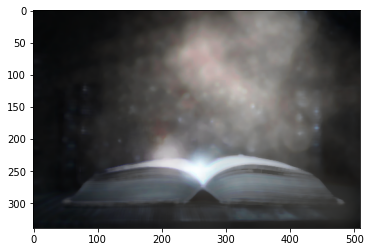

In [97]:
# Applying the median filter on an image with size 8
median_filter=ndimage.median_filter(img,8)
plt.imshow(median_filter)

4) Sobel Filter

Edge detection filter

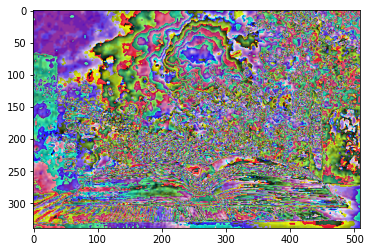

In [109]:
# Applying the sobel filter on an image with by default axis = -1
sobel_filter=ndimage.sobel(img)
plt.imshow(sobel_filter)

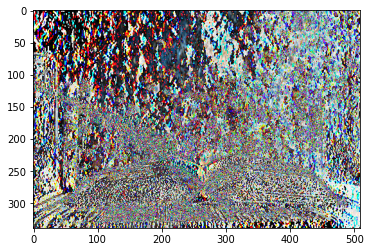

In [110]:
# Applying the sobel filter on an RGB image with sigma with axis = -2
sobel_filter=ndimage.sobel(img, axis=-2)
plt.imshow(sobel_filter)

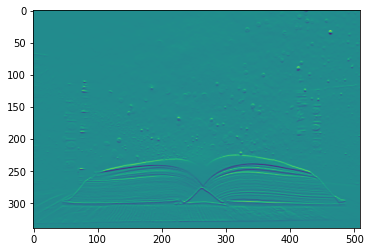

In [111]:
# Applying the sobel filter on gray scale version of an original RGB image with axis = -2
sobel_filter=ndimage.sobel(img2, axis=-2)
plt.imshow(sobel_filter)

We can see that we are able to see the egdes only if we applied the sobel filter on the gray scaled version of an orginal RGB image